In [1]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import animation
from mlp import MLP
from activation import Activation
from hiddenlayer import HiddenLayer
import time
import h5py

/Users/geyang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Helper functions 
### 1. One Hot Encoding

In [2]:
def to_cate(label):
    label_new = np.zeros((len(label),10))
    for i in range(len(label)):
        a = label[i]
        label_new[i][a] = 1
    return label_new

### 2. Split data to training and testing

In [3]:
def split(data, label, test_size=1/6):
    num_samples = data.shape[0]
    permutation = np.random.permutation(num_samples)
    
    train_size = int(num_samples*(1-test_size))
    
    train_idx = permutation[0:train_size]
    test_idx = permutation[train_size-1:-1]
    
    return data[train_idx],data[test_idx],label[train_idx],label[test_idx]
    

# Load data

In [4]:
with h5py.File('../Input/train_128.h5','r') as H: 
    data = np.copy(H['data'])
with h5py.File('../Input/train_label.h5','r') as H:
    label = np.copy(H['label'])
print(np.unique(label))
print(data.shape)
print(label.shape)

OSError: Unable to open file (unable to open file: name = '../Input/train_128.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# Split dataset to training and testing

In [5]:
X_train, X_test, y_train, y_test = split(data, label, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'data' is not defined

# One Hot Encoding

In [6]:
y_train_cat_label = to_cate(y_train)
print(y_train_cat_label.shape)

(48000, 10)


# Standardization

In [7]:
X_train_normal = (X_train - X_train.mean(axis = 0))/(np.std(X_train, axis=0))
X_test_normal = (X_test - X_train.mean(axis = 0))/(np.std(X_train, axis=0))

# Training

In [8]:
time1 = time.time()
nn = MLP([128,80,90,70,10], [None,'relu','relu','relu','softmax'])
loss = nn.fit(X_train_normal, y_train_cat_label, learning_rate=0.1,weight_decay = 1e-5,epochs=150,batch_size = 128,batch_norm = True,momentum_gamma = 0.9,dropout=0.7,loss_function = "cross_entropy")
print('loss:%f'%loss[-1])
time2 = time.time()
print(time2-time1," seconds")

epochs =  0
0.7763803260491094
epochs =  1
0.4973880375239878
epochs =  2
0.45370331768819877
epochs =  3
0.4337696507787162
epochs =  4
0.41203039449198786
epochs =  5
0.4025850583352653
epochs =  6
0.3998799383132531
epochs =  7
0.387531060771849
epochs =  8
0.3784695183529075
epochs =  9
0.3742280521122972
epochs =  10
0.36846363454666303
epochs =  11
0.36885621072621855
epochs =  12
0.3608148015167808
epochs =  13
0.3558098611423793
epochs =  14
0.357222404833324
epochs =  15
0.3518906718348855
epochs =  16
0.3446141124233586
epochs =  17
0.3443791905352282
epochs =  18
0.33854629651762663
epochs =  19
0.3375541495558278
epochs =  20
0.34080804737377285
epochs =  21
0.3363566549395863
epochs =  22
0.3318967140133261
epochs =  23
0.3380280672087385
epochs =  24
0.33091215543782004
epochs =  25
0.3309478056434265
epochs =  26
0.3270856081093853
epochs =  27
0.3265954440626753
epochs =  28
0.32648185814453895
epochs =  29
0.3245226468067579
epochs =  30
0.3268104504593385
epochs =  31

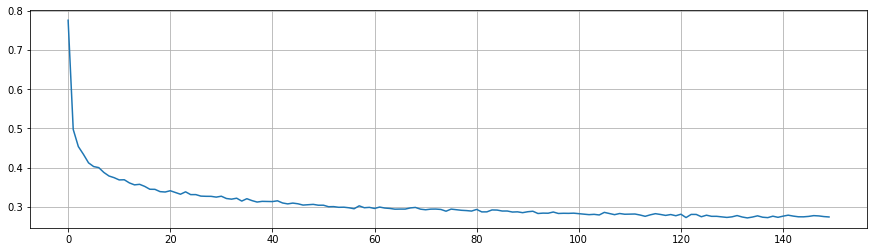

In [9]:
pl.figure(figsize=(15,4))
pl.plot(loss)
pl.grid()

# Predicting

In [10]:
y_pre_cat = nn.predict(X_test_normal)
y_pre = np.argmax(y_pre_cat, axis=1)

test_data_size = y_test.shape[0]
accuracy = np.where((y_test == y_pre) == True)[0].shape[0]/test_data_size
print(accuracy)

0.8951666666666667


# Use all training data for training, then create output data file

In [11]:
with h5py.File('../Input/test_128.h5','r') as H: 
    data_test = np.copy(H['data'])
data_test.shape

(10000, 128)

In [12]:
X_train = data
X_test = data_test
y_train = label
y_train_cat_label = to_cate(y_train)

In [13]:
X_train_normal = (X_train - X_train.mean(axis = 0))/(np.std(X_train, axis=0))
X_test_normal = (X_test - X_train.mean(axis = 0))/(np.std(X_train, axis=0))

In [14]:
print(X_train_normal.shape)
print(X_test_normal.shape)
print(y_train_cat_label.shape)

(60000, 128)
(10000, 128)
(60000, 10)


In [15]:
nn = MLP([128,80,90,70,10], [None,'relu','relu','relu','softmax'])
loss = nn.fit(X_train_normal, y_train_cat_label, learning_rate=0.1,weight_decay = 1e-5,epochs=150,batch_size = 128,batch_norm = True,momentum_gamma = 0.9,dropout=0.7,loss_function = "cross_entropy")
print('loss:%f'%loss[-1])
time2 = time.time()
print(time2-time1," seconds")

epochs =  0
0.720634809634873
epochs =  1
0.48540948821960106
epochs =  2
0.4440204446298687
epochs =  3
0.42214989777611533
epochs =  4
0.4106402624447156
epochs =  5
0.3965129175871577
epochs =  6
0.3880636576978578
epochs =  7
0.3810667312674086
epochs =  8
0.3725041213566476
epochs =  9
0.36865914898271973
epochs =  10
0.36694413719448504
epochs =  11
0.3632103770136267
epochs =  12
0.3584110616455513
epochs =  13
0.35585429411991076
epochs =  14
0.3549886284066722
epochs =  15
0.3476677916258865
epochs =  16
0.3461086110969438
epochs =  17
0.3422654514560668
epochs =  18
0.33993592763970726
epochs =  19
0.3407005043937911
epochs =  20
0.33797178476203893
epochs =  21
0.33239810552501586
epochs =  22
0.33553801720026316
epochs =  23
0.3308573511833764
epochs =  24
0.33158231695685464
epochs =  25
0.3277675161666487
epochs =  26
0.32735442087917044
epochs =  27
0.32846612052866353
epochs =  28
0.3241676708591945
epochs =  29
0.32014530148332787
epochs =  30
0.32600245435592196
epoch

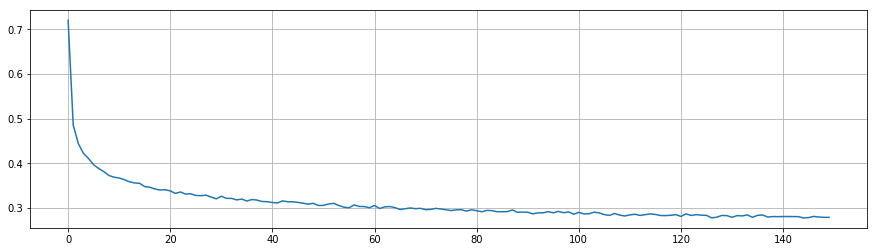

In [16]:
pl.figure(figsize=(15,4))
pl.plot(loss)
pl.grid()

In [17]:
y_pre_cat = nn.predict(X_test_normal)
y_pre = np.argmax(y_pre_cat, axis=1)


In [18]:
# h = h5py.File('../Output/Predicted_labels.h5', 'w')
h = h5py.File('../Output/Predicted_labels.h5', 'w')
dset = h.create_dataset('label', data=y_pre)

In [19]:
# Predicted_labels.h5
with h5py.File('../Output/Predicted_labels.h5','r') as H: 
    predicted_test_label = np.copy(H['label'])
predicted_test_label.shape

(10000,)

In [21]:
set(predicted_test_label)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}